In [4]:
from matplotlib import pyplot as plt
import numpy as np
from plotting import *
from genetic_algorithm import *
from fitness import power_output
from utils import *


chromosome 1: ['0111010000100001010110', '1001110101101001100001', '0001001010010011010111', '0000100101001111110001', '0000000101101101000100']
chromosome 2: ['0110010111100100100100', '0001101011010101000001', '0101110000110011010111', '0100100000110110100110', '0000100000100010110100']
chromosome 3: ['1000110110101001000011', '0110100011101110011000', '0110001000100101111111', '1010110011101111111010', '0101100101001110001101']
chromosome 4: ['0011010001110000011001', '0010000010000111000011', '1000000011110001101001', '0011111011001010011111', '0011101100110011000110']
chromosome 5: ['1010101101100010100100', '0110110010001011011000', '0100111110110000000100', '0011110010110100100001', '0100000010010000010101']


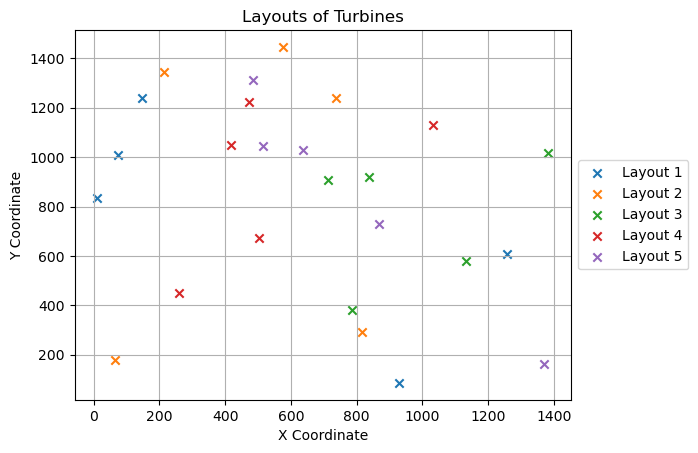

[[(929, 86), (1259, 609), (148, 1239), (74, 1009), (11, 836)], [(815, 292), (214, 1345), (737, 1239), (577, 1446), (65, 180)], [(1133, 579), (839, 920), (785, 383), (1383, 1018), (714, 909)], [(419, 1049), (260, 451), (1031, 1129), (502, 671), (473, 1222)], [(1371, 164), (868, 728), (637, 1028), (485, 1313), (516, 1045)]]


In [2]:
population_size = 5
area_size = 1500
minimum_spacing = 200
n_turbines = 5
num_bits = determine_num_bits(area_size)

population = initialize_population(population_size, n_turbines, area_size, minimum_spacing)
for idx, layout in enumerate(population):
    print(f"chromosome {idx + 1}: {layout}")

population_decoded = [[decode_binary_to_position(pos, num_bits) for pos in layout] for layout in population]
plot_multiple_layouts(population_decoded)
print(population_decoded)

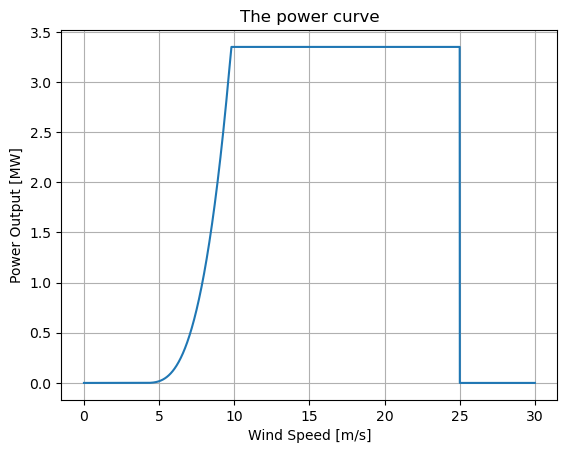

In [5]:
x = np.arange(0, 30, 0.01)
y = [power_output((500,0), wind_speed) for wind_speed in x]
plt.figure()
plt.plot(x, y)
plt.title('The power curve')
plt.xlabel('Wind Speed [m/s]')
plt.ylabel('Power Output [MW]')
plt.grid(True)
plt.show()

Fitness values: [-142.77300960686415, -797.066462723689, -1202.467826068415, -836.6423935256691, -1313.9104588134348]


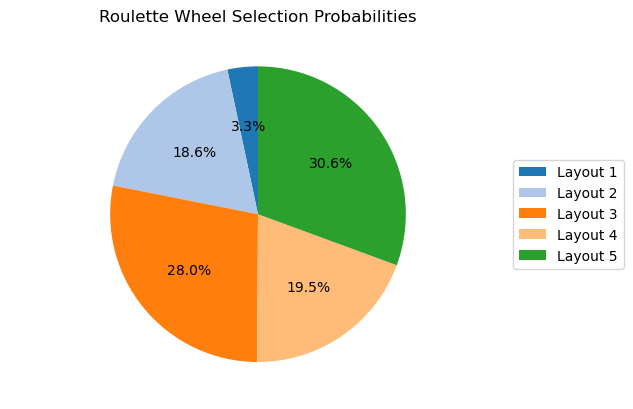

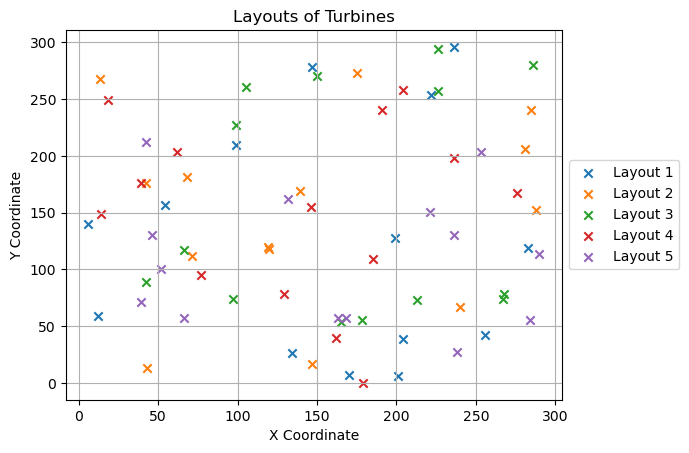

In [9]:
# Test
population_size = 5
n_turbines = 14
area_size = 300
min_spacing = 50
wind_speed = 9.8
wind_direction = 270.0
fitness_weights = {
        'energy_production': 0.5,
        'boundary_fitness': 0.2,
        'spacing_fitness': 0.2,
        'wake_fitness': 0.1,
        'is_valid': 1,
    }
fitness_params = (fitness_weights, area_size, min_spacing, wind_speed, wind_direction)

num_bits = determine_num_bits(area_size)

population = initialize_population(population_size, n_turbines, area_size, min_spacing)
fitness_values = evaluate_fitness(population, *fitness_params)
print("Fitness values:", fitness_values)

total_fitness = sum(fitness_values)
probabilities = [fitness / total_fitness for fitness in fitness_values] if total_fitness else []

plot_roulette_wheel(probabilities)
plot_multiple_layouts(population_decoded)